In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = datasets.load_iris()

X = iris.data[:, 2:4] 
y = iris.target

print('Class labels: {}'.format(np.unique(y)))

Class labels: [0 1 2]


In [3]:
# standarlization of data, set mean to 0, standard deviation to 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
print('Mean of X is {:0.2f}'.format(np.mean(X)))
print('Standard deviation of X is {:0.2f}'.format(np.std(X)))

Mean of X is -0.00
Standard deviation of X is 1.00


In [4]:
# split the data into train sets and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3, 
    random_state=0)   

C: This is the penalty parameter and helps in fitting the boundaries smoothly and appropriately, default=1  

Kernel: A kernel is a similarity function for pattern analysis. It must be one of rbf/ linear/poly/sigmoid/precomputed, default=’rbf’ (Radial Basis Function). Choosing an appropriate kernel will result in a better model fit.

In [44]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
print('Train - Accuracy: ')
print(accuracy_score(y_train, clf.predict(X_train)))
print('Train - Confusion matrix: ')
print(confusion_matrix(y_train, clf.predict(X_train)))
print('Train - Classification report: ')
print(classification_report(y_train, clf.predict(X_train)))

Train - Accuracy: 
0.952380952381
Train - Confusion matrix: 
[[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - Classification report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        34
          1       0.91      0.94      0.92        32
          2       0.95      0.92      0.94        39

avg / total       0.95      0.95      0.95       105



In [46]:
print('Test - Accuracy: ')
print(accuracy_score(y_test, clf.predict(X_test)))
print('Test - Confusion matrix: ')
print(confusion_matrix(y_test, clf.predict(X_test)))
print('Test - Classification report: ')
print(classification_report(y_test, clf.predict(X_test)))

Test - Accuracy: 
0.977777777778
Test - Confusion matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - Classification report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       1.00      0.94      0.97        18
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



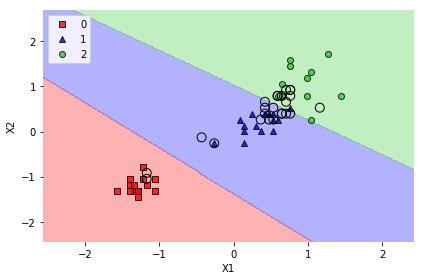

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

# mlxtend need to install in advance.
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, clf=clf, 
                      res=0.02,
                      legend=2,
                      X_highlight=clf.support_vectors_)

# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
# facecolors='orange')

# plt.scatter(X_test[:,0],X_test[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()